# K Means Clustering


## Our Objective - Perform K-Means Clustering to detect Network Intrusion Attempts (Cybersecurity)

![alt text](http://konukoii.com/blog/wp-content/uploads/2017/01/RunyanKmeans.gif "Logo Title Text 1")


## What is K means Clustering??

![alt text](https://i.stack.imgur.com/cIDB3.png "Logo Title Text 1")

What have we already learned?
- The goal of machine learning is to optimize for an objective function. 
- There exist two optimization categories, first order and second order.
- Both compute a loss function by minimizing the difference between a real label to a predicted label value through 
convex optimization (i.e gradient descent, newton's method)

But what happens when we don't have labels for our data? 

### Enter unsupervised learning. 

![alt text](https://s-media-cache-ak0.pinimg.com/736x/8b/23/3e/8b233e2d7f26b00d0c594894917a127b--supervised-learning-variables.jpg "Logo Title Text 1")

![alt text](https://image.slidesharecdn.com/summit2014presentationfinal-141031070327-conversion-gate02/95/set-your-content-straight-28-638.jpg?cb=1414739431 "Logo Title Text 1")

Clustering -  A typical and well-known type of unsupervised learning. Clustering algorithms try to find natural groupings in data. Similar data points (according to some notion of similarity) are considered in the same group. We call these groups clusters.

K-Means clustering is a simple and widely-used clustering algorithm. Given value of  k , it tries to build  k  clusters from samples in the dataset. 

### How does it work ?

![alt text](http://i.imgur.com/nIhdPrS.jpg "Logo Title Text 1")

Given  k , the K-means algorithm works as follows:
1. Randomly choose  k  data points (seeds) to be the initial centroids
2. Assign each data point to the closest centroid
3. Re-compute (update) the centroids using the current cluster memberships
4. If a convergence criterion is not met, go to step 2

We can also terminate the algorithm when it reaches an iteration budget, which yields an approximate result. The algorithm is sensitive to the order in which data samples are explored, so run it several times to get varied orders, then average the cluster centers from each run and input those centers as ones for one final run analysis.

### How to determine the best value for k? 

Do you know how many classes you want to find? Use that as K. 

If not, The Elbow Method is a very popular way. 

![alt text](https://qph.ec.quoracdn.net/main-qimg-678795190794dd4c071366c06bf32115-c "Logo Title Text 1")
![alt text](http://i.imgur.com/aLKDhbF.png "Logo Title Text 1")

### How is the distance between centroids and data points measured?

The Euclidean distance! Because K-means minimizes within-cluster variance and f you look at the definition of variance, it is identical to the sum of squared Euclidean distances from the center. Other distances are possible, euclidean is by far the most popular. 

## When should I use it?

- Your data is numeric. It doesn't work with categorical features. We're computing the distance between real numbers!
- If you don't have labels for your data
- K-means is the simplest. To implement and to run. All you need to do is choose "k" and run it a number of times.
- K-means and other clustering algorithms shine when you have multivariate data. They will "work" with 1-dimensional data, but they are not very smart anymore.
- useful when you have an idea of how many clusters actually exists in your space. 

## Other examples

- https://github.com/georgymh/ml-fraud-detection (Fraud Detection)
- https://github.com/Datamine/MNIST-K-Means-Clustering/blob/master/Kmeans.ipynb (MNIST without labels (finally)) 


In [ ]:
#matrix math
import numpy as np
#graphing
import matplotlib.pyplot as plt
#graphing animation
import matplotlib.animation as animation

In [18]:
#load textfile dataset (2D data points)
# for each user, how many packets are sent per second and what's the size of a packet
#anomalies (DDOS attempts) will have lots of big packets sent in a short amount of time 
def load_dataset(name):
    return np.loadtxt(name)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/dc0281a964ec758cca02ab9ef91a7f54ac00d4b7 "Logo Title Text 1")


In [19]:
#euclidian distance between 2 data points. For as many data points as necessary. 
def euclidian(a, b):
    return np.linalg.norm(a-b)



O k-means algorithm 
With the above steps, since we needed to build our algorithm, which will receive as parameters:


- K: The number of clusters (required)
- epsilon: The minimum error to be used in the stop condition (optional, default == 0)
- Distance: The method is used to calculate the distance (Optional defalut == 0)
And has the return:
- the centroids
- The evolution history of centroids
- And the membership vector of each instance with its respective centroid


In [27]:
def kmeans(k, epsilon=0, distance='euclidian'):
    #list to store past centroid
    history_centroids = []
    #set the distance calculation type 
    if distance == 'euclidian':
        dist_method = euclidian
    #set the dataset
    dataset = load_dataset('durudataset.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    # get the number of rows (instances) and columns (features) from the dataset
    num_instances, num_features = dataset.shape
    #define k centroids (how many clusters do we want to find?) chosen randomly 
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    #set these to our list of past centroid (to show progress over time)
    history_centroids.append(prototypes)
    #to keep track of centroid at every iteration
    prototypes_old = np.zeros(prototypes.shape)
    #to store clusters
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        #for each instance in the dataset
        for index_instance, instance in enumrate(dataset):
            #define a distance vector of size k
            dist_vec = np.zeros((k,1))
            #for each centroid
            for index_prototype, prototype in enumerate(prototypes):
                #compute the distance between x and centroid
                dist_vec[index_prototype] = dist_method(prototype, instance)
            #find the smallest distance, assign that distance to a cluster
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
            
        tmp_prototypes = np.zeros((k, num_features))
        
        #for each cluster (k of them)
        for index in range(len(prototypes)):
            #get all the points assigned to a cluster
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            #find the mean of those points, this is our new centroid
            prototype = np.mean(dataset[instances_close], axis=0)
            #add our new centroid to our new temporary list
            tmp_prototypes[index, :] = prototype
        
        #set the new list to the current list
        prototypes = tmp_prototypes
        
        #add our calculated centroids to our history for plotting
        history_centroids.append(tmp_prototypes)

    #return calculated centroids, history of them all, and assignments for which cluster each datapoint belongs to
    return prototypes, history_centroids, belongs_to
    

In [21]:
#lets define a plotting algorithm for our dataset and our centroids
def plot(dataset, history_centroids, belongs_to):
    #we'll have 2 colors for each centroid cluster
    colors = ['r', 'g']

    #split our graph by its axis and actual plot
    fig, ax = plt.subplots()

    #for each point in our dataset
    for index in range(dataset.shape[0]):
        #get all the points assigned to a cluster
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        #assign each datapoint in that cluster a color and plot it
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        #print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()


In [22]:
#main file 
def execute():
    #load dataset
    dataset = load_dataset('durudataset.txt')
    #train the model on the data
    centroids, history_centroids, belongs_to = kmeans(2)
    #plot the results
    plot(dataset, history_centroids, belongs_to)



<IPython.core.display.Javascript object>


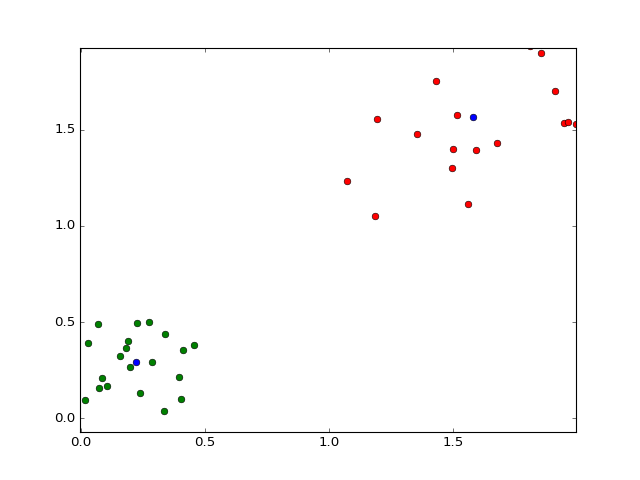

centroids 1 [ 1.58058247  1.56897412]
centroids 1 [ 0.22331067  0.28960446]
centroids 2 [ 1.58058247  1.56897412]
centroids 2 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 3 [ 0.22331067  0.28960446]


In [23]:
%matplotlib notebook

#do everything
execute()

In [24]:
%matplotlib notebook
def plot_step_by_step(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))
                
                plt.pause(0.8)


<IPython.core.display.Javascript object>


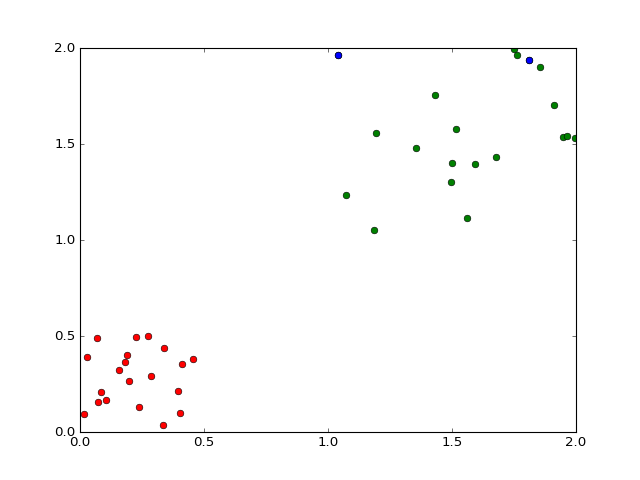

<IPython.core.display.Javascript object>


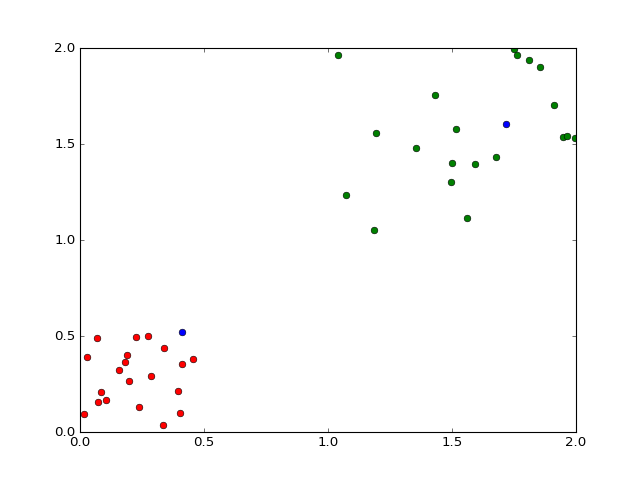

<IPython.core.display.Javascript object>


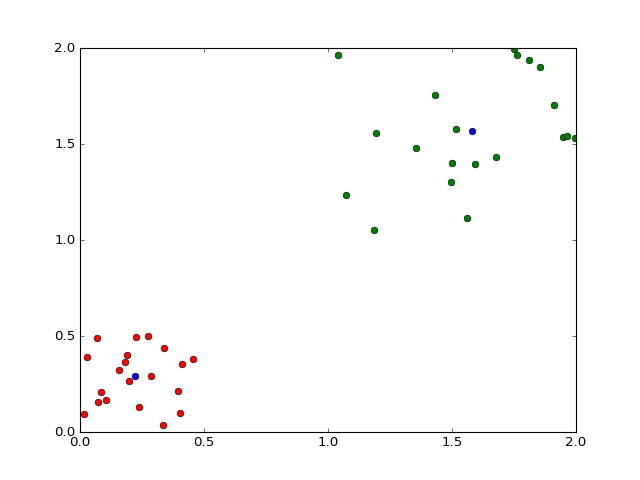

<IPython.core.display.Javascript object>


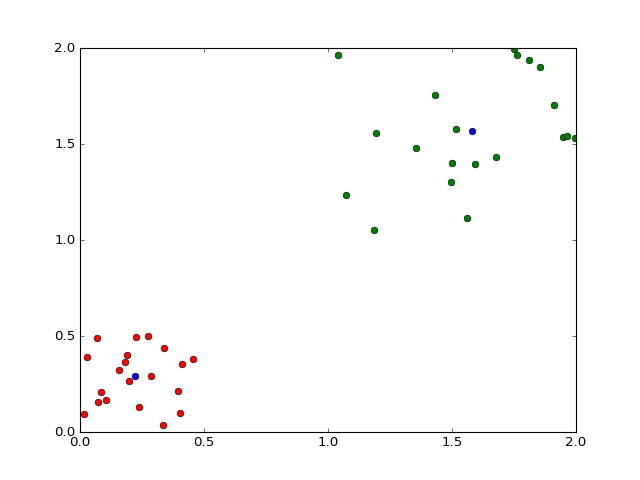

<IPython.core.display.Javascript object>


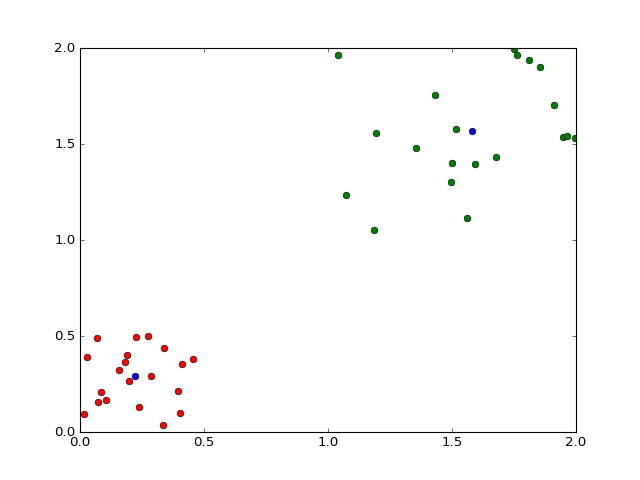

In [28]:
for item in history_centroids:
    plot_step_by_step(dataset, [item], belongs_to)
